## Decision Tree Classifier

**Karina Huang, Lipika Ramaswamy**

---

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('../qii_analysis/')
from qii_upd import intervene, random_intervene_point, unary_individual_influence, shapley_influence
os.chdir('../models/')
pd.set_option('display.max_columns', 500)

import pickle

In [3]:
data = pd.read_csv('../data/data_final.csv', index_col = ['Unnamed: 0'])
#check data
data.head()

,id,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid
0,1,Male,69,Other,0,0,0,0,1,Low,0,1,Low,0,0
1,3,Male,34,African-American,0,0,0,0,3,Low,1,1,Low,1,1
2,4,Male,24,African-American,0,0,1,4,4,Low,1,3,Low,0,1
3,5,Male,23,African-American,0,1,0,1,8,High,0,6,Medium,0,0
4,6,Male,43,Other,0,0,0,2,1,Low,0,1,Low,0,0


In [4]:
#get dummy variables
data_new = pd.get_dummies(data, columns = ['sex', 'race'])

In [5]:
#set predictor and response columns
predictors = ['age', 'juv_misd_count', 'priors_count', 'sex_Female', 
              'sex_Male', 'race_African-American', 'race_Asian', 
              'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other']
# genR = ['decile_score']
genR = ['score_text']
# vR = ['v_decile_score']
vR = ['v_score_text']

In [6]:
#train test split data 
train, test = train_test_split(data_new, test_size = 0.20, random_state = 221)

In [7]:
test.head()

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
2727,4162,25,4,0,0,13,10,High,1,9,High,0,1,0,1,1,0,0,0,0,0
1298,1987,54,0,0,0,4,2,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0
3234,4948,29,0,0,0,1,4,Low,0,2,Low,0,0,0,1,0,0,1,0,0,0
4956,7546,21,1,0,3,2,10,High,1,8,High,0,0,0,1,0,0,1,0,0,0
1828,2771,37,0,0,0,3,1,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0


In [8]:
def getXY(df, pred, resp):
    
    X = df[pred]
    Y = df[resp]
    
    return X, Y

def getModel(df, pred, resp):
    
    m = DecisionTreeClassifier(random_state = 221)
    x, y = getXY(df, pred, resp)
    m.fit(x, y)
    
    return m

In [9]:
#model for general decile score
mG = getModel(train, predictors, genR)
#model for violence decile score
mV = getModel(train, predictors, vR)

In [10]:
#get test predictions
test_predG = mG.predict(getXY(test, predictors, genR)[0])
test_predV = mV.predict(getXY(test, predictors, genR)[0])

#get training predictions
train_predG = mG.predict(getXY(train, predictors, vR)[0])
train_predV = mV.predict(getXY(train, predictors, vR)[0])

In [11]:
#get test prediction accuracy scores
test_accG = accuracy_score(getXY(test, predictors, genR)[1], test_predG)
test_accV = accuracy_score(getXY(test, predictors, vR)[1], test_predV)

#get training prediction accuracy scores
train_accG = accuracy_score(getXY(train, predictors, genR)[1], train_predG)
train_accV = accuracy_score(getXY(train, predictors, vR)[1], train_predV)

print('Training Prediction Accuracy Score: ')
print('General Decile Score: ', train_accG)
print('Violence Decile Score: ', train_accV)
print()
print('Test Prediction Accuracy Score: ')
print('General Decile Score: ', test_accG)
print('Violence Decile Score: ', test_accV)

Training Prediction Accuracy Score: 
General Decile Score:  0.767631259747011
Violence Decile Score:  0.8400623808698666

Test Prediction Accuracy Score: 
General Decile Score:  0.5876645876645876
Violence Decile Score:  0.7172557172557172


In [14]:
#get test prediction f1 scores
test_f1G = f1_score(getXY(test, predictors, genR)[1], test_predG, average = 'weighted')
test_f1V = f1_score(getXY(test, predictors, vR)[1], test_predV, average = 'weighted')

#get training prediction f1 scores
train_f1G = f1_score(getXY(train, predictors, genR)[1], train_predG, average = 'weighted')
train_f1V = f1_score(getXY(train, predictors, vR)[1], train_predV, average = 'weighted')

print('Training Prediction F1 Score: ')
print('General Decile Score: ', train_f1G)
print('Violence Decile Score: ', train_f1V)
print()
print('Test Prediction F1 Score: ')
print('General Decile Score: ', test_f1G)
print('Violence Decile Score: ', test_f1V)

Training Prediction F1 Score: 
General Decile Score:  0.7572771651668888
Violence Decile Score:  0.8325964921486614

Test Prediction F1 Score: 
General Decile Score:  0.5665028989679454
Violence Decile Score:  0.7062823700211605


## QIIs

### QII for individual outcomes

Below we illustrate the use of unary QII measures to get the average QII measure computed for features in the COMPAS dataset. The average QII measure is computed using the following equation: 

Given an algorithm $\mathcal{A}$ that operates on inputs (features), $\mathcal{N} = \{1, \ldots, n\}$. Every $i\in\mathcal{N}$ can take on various states given by $X_i$.

Let $ X = \Pi_{i\in\mathcal{N}} X_i$ be the set of possible feature state vectors, let $\mathcal{Z}$ be the set of possible outputs $\mathcal{A}$. 

Let the quantity of interest be the classification outcome for a particular individual. 

The probability that the feature $i$ is pivotal to the classification $c(\mathbf{x})$ of an individual is given by $\mathbb{E}(i\text{ is pivotal for }c(X)|X=\mathbf{x})$.

Computing the average of this quantity over the entire dataset yields:

$$ \mathbb{E}(i\text{ is pivotal for }c(X)) = \sum_{\mathbf{x}\in X} Pr(X=x) \cdot \mathbb{E}(i\text{ is pivotal for }c(X)|X=\mathbf{x})$$



$$\iota_{disp}^{\mathcal{Y}}(i) = Q_{disp}^{\mathcal{Y}} (X) - Q_{disp}^{\mathcal{Y}} (X_{-i}U_i)$$

In [15]:
unary_individual_influence(dataset = test, 
                           cls = mV, 
                           x_ind = 4956, 
                           varList = ['priors_count'], 
                           binary = [False],
                           predictors = predictors)

{'priors_count': 0.02494802494802495}

In [16]:
all_indices = list(test.index)
# list of values of whether a variable is binary or not 
binary_vals = [False, False, False, 
               True, True,
               True, True, 
               True, True, 
               True, True]

In [17]:
all_results = {}
for pred in predictors:
    all_results[pred] = []

for key, ind in enumerate(all_indices):
    if key % 20 == 0:
        print(key)
    evaluate = unary_individual_influence(dataset = test,
                                          cls = mV, 
                                          x_ind = ind, 
                                          varList = predictors, 
                                          binary = binary_vals,
                                          predictors=predictors)
    for pred in predictors:
        all_results[pred].append(evaluate[pred])

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440


In [20]:
# get_avg
mean_ = {}
var_ = {}
for pred in predictors:
    get_all = all_results[pred]
    mean_[pred] = np.mean(get_all)
    var_[pred] = np.var(get_all)

In [123]:
with open('means_individualQ11_modelV.pkl', 'wb') as handle:
    pickle.dump(mean_, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('means_individualQ11_modelV.pkl', 'rb') as handle:
    mean_ = pickle.load(handle)

''

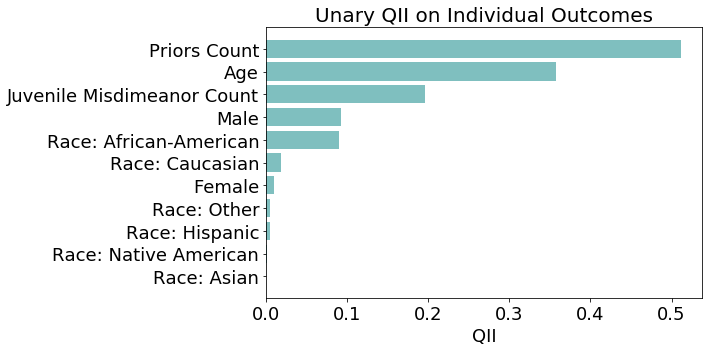

In [142]:
import matplotlib.pyplot as plt
labels_predicts = ['Age', 'Juvenile Misdimeanor Count', 'Priors Count', 'Female', 'Male',
                'Race: African-American', 'Race: Asian', 'Race: Caucasian', 'Race: Hispanic', 
                'Race: Native American', 'Race: Other']
res = {} 
for key in predictors: 
    for value in labels_predicts: 
        res[key] = value 
        labels_predicts.remove(value) 
        break  
sorted_x = dict(sorted(mean_.items(), key=lambda mean_: mean_[1]))
labs = []
for i in range(len(res)):
    labs.append(res[list(sorted_x.keys())[i]])

plt.figure(figsize=(10,5))
y_pos = np.arange(len(sorted_x.keys()))
performance = list(sorted_x.values())

plt.barh(y_pos, performance, align='center', alpha=0.5, color = 'teal')
plt.yticks(y_pos, labs, fontsize = 18)
plt.xlabel('QII', fontsize = 18)
plt.xticks( fontsize = 18)
plt.title('Unary QII on Individual Outcomes', fontsize = 20)
plt.tight_layout()

# plt.grid(True, lw=1.75, ls='--', alpha=0.2) # thanks bharvz
plt.savefig('unaryQIIind.png', dpi = 300)
;

## Set and Marginal QII



In [19]:
X_test, y_test = getXY(test, predictors, genR)

In [20]:
X_test.head()

,age,juv_misd_count,priors_count,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
2727,25,0,13,0,1,1,0,0,0,0,0
1298,54,0,4,0,1,0,0,1,0,0,0
3234,29,0,1,0,1,0,0,1,0,0,0
4956,21,0,2,0,1,0,0,1,0,0,0
1828,37,0,3,0,1,0,0,1,0,0,0


In [27]:
shapley_influence(dataset=X_test, 
                  cls = mV, 
                  x_ind = 4956, 
                  X_test = X_test, 
                  varList = ['juv_misd_count', 'priors_count', 'race_African-American' ], 
                 predictors = predictors)

{'juv_misd_count': 0.020663888888888836,
 'priors_count': 0.02711388888888875,
 'race_African-American': 0.023888888888888793}

In [22]:
test.head()

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
2727,4162,25,4,0,0,13,10,High,1,9,High,0,1,0,1,1,0,0,0,0,0
1298,1987,54,0,0,0,4,2,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0
3234,4948,29,0,0,0,1,4,Low,0,2,Low,0,0,0,1,0,0,1,0,0,0
4956,7546,21,1,0,3,2,10,High,1,8,High,0,0,0,1,0,0,1,0,0,0
1828,2771,37,0,0,0,3,1,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0
